# sspa tutorial: Single sample pathway analysis in Python

In [1]:
!pip install .

Processing /Users/cw2019/Documents/PhD/py-ssPA
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for sspa: filename=sspa-0.1.2-py3-none-any.whl size=7941169 sha256=d4af7d28a8b15cbb949f3a42dbbf741f6d70dec729bcc512043ea71a1189d6d1
  Stored in directory: /Users/cw2019/Library/Caches/pip/wheels/e7/b9/a8/4dedf707e1593a2a64db30db0e2c90b0d8bf0ea5e93762813c
Successfully built sspa
  Attempting uninstall: sspa
    Found existing installation: sspa 0.1.2
    Uninstalling sspa-0.1.2:
      Successfully uninstalled sspa-0.1.2


In [2]:
import sspa
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load and process metabolomics data

Pre-processing example COVID mass spectrometry dataset

In [3]:
covid_data = sspa.load_example_data(omicstype="metabolomics", processed=False)

In [4]:
covid_values = covid_data.iloc[:, :-2]
data_filt = covid_values.loc[:, covid_values.isin([' ', np.nan, 0]).mean() < 0.5]

met_median = data_filt.median(axis=0, skipna=True)  # median value for each metabolite
scale_mat = data_filt.divide(met_median, axis=1)  # scale the matrix by the metabolite median
samp_median = scale_mat.median(axis=1, skipna=True)  # median value for each sample
norm_mat = data_filt.divide(samp_median, axis=0)  # scale by sample median

imputed_mat = norm_mat.fillna(norm_mat.median())
log2_mat = np.log2(imputed_mat)
processed_data = pd.DataFrame(StandardScaler().fit_transform(log2_mat), columns=imputed_mat.columns, index=imputed_mat.index)

In [25]:
processed_data.head()

,S-1-pyrroline-5-carboxylate,spermidine,1-methylnicotinamide,"12,13-DiHOME",alpha-ketoglutarate,kynurenate,3-hydroxyisobutyrate,3-hydroxy-3-methylglutarate,homovanillate (HVA),3-phosphoglycerate,...,"bilirubin degradation product, C16H18N2O5 (2)**","bilirubin degradation product, C17H18N2O4 (1)**","bilirubin degradation product, C17H18N2O4 (2)**","bilirubin degradation product, C17H18N2O4 (3)**","bilirubin degradation product, C17H20N2O5 (1)**","bilirubin degradation product, C17H20N2O5 (2)**",tetrahydrocortisol glucuronide,"N,N-dimethyl-pro-pro",oxindolylalanine,tetrahydrocortisone glucuronide (5)
sample_id,,,,,,,,,,,,,,,,,,,,,
1004596,-0.756979,0.552163,-0.317382,0.726321,-0.608606,-0.815994,-1.783925,-1.367964,-0.196991,-0.128764,...,-0.082822,-0.008485,0.073663,0.163788,-0.209951,-0.221960,0.143159,-0.830118,-0.846009,0.538409
1008097,0.079818,-0.839393,0.491280,-1.867786,-0.044496,-0.390190,-0.293450,-1.008025,-0.115982,-1.042743,...,0.025147,0.286299,0.114470,0.214872,-0.252672,-0.389336,0.299374,-0.278807,0.640936,0.931221
1008631,0.978372,-1.281277,-0.199487,0.355229,0.014784,-0.447509,-0.004413,1.236799,-0.516527,-1.008731,...,0.887881,0.120373,0.559326,0.579894,0.475454,0.392656,0.788248,-0.089581,0.633529,0.347035
1012545,-0.937540,-0.242391,1.636530,2.080704,-0.315610,0.111717,-0.148053,0.127448,-0.115982,-1.238096,...,1.080541,0.811562,0.682729,0.549101,0.416711,0.212145,-0.916428,-0.300312,1.123716,-0.077702
1022407,-0.652496,-0.110733,0.814461,-0.886903,0.409608,0.274345,0.774593,-0.497736,-0.115982,-1.023649,...,0.439088,0.970306,0.852974,0.835494,0.220687,0.197174,0.361032,-0.463056,0.196806,0.671461


OPTIONAL: Save the processed data to cvs format

processed_data.to_csv("example_covid_data_processed.csv")

Alternatively, to load the pre-processed dataset, set the argument "processed" to True

In [8]:
covid_data_processed = sspa.load_example_data(omicstype="metabolomics", processed=True)

### Loading your own dataset

The easiest way to load your own metabolomics dataset to use with sspa is to use the pandas.read_csv() function to read in the CSV file. You can also read in sample metadata as part of the same file, or as a separate file, as long as all metadata is in the form of pandas Series/DataFrame columns. 

In [ ]:
# my_metabolomics_data = pd.read_csv("path/to/inputdata.csv")

## Identifier harmonisation

Use the identifier_conversion function to get identifier mappings. Change the input_type argument to the type of compound identifier you are converting from. This step may take a few minutes to complete.

In [5]:
compound_names = processed_data.columns.tolist()
conversion_table = sspa.identifier_conversion(input_type="name", compound_list=compound_names)

In [12]:
conversion_table

,Query,Match,HMDB,PubChem,ChEBI,KEGG,METLIN,SMILES,Comment
0,S-1-pyrroline-5-carboxylate,NA,NA,NA,NA,NA,NA,NA,0
1,spermidine,Spermidine,HMDB0001257,1102,16610,C00315,254,NCCCCNCCCN,1
2,1-methylnicotinamide,1-Methylnicotinamide,HMDB0000699,457,16797,C02918,5667,C[N+]1=CC=CC(=C1)C(N)=O,1
3,"12,13-DiHOME","12,13-DHOME",HMDB0004705,10236635,72665,C14829,None,CCCCCC(C(C/C=C\CCCCCCCC(=O)O)O)O,1
4,alpha-ketoglutarate,Oxoglutaric acid,HMDB0000208,51,30915,C00026,5218,OC(=O)CCC(=O)C(O)=O,1
...,...,...,...,...,...,...,...,...,...
895,"bilirubin degradation product, C17H20N2O5 (2)**",NA,NA,NA,NA,NA,NA,NA,0
896,tetrahydrocortisol glucuronide,NA,NA,NA,NA,NA,NA,NA,0
897,"N,N-dimethyl-pro-pro",NA,NA,NA,NA,NA,NA,NA,0
898,oxindolylalanine,NA,NA,NA,NA,NA,NA,NA,0


Count how many identifiers have matches

In [13]:
conversion_table["Comment"].value_counts()

0    547
1    353
Name: Comment, dtype: int64

In [6]:
processed_data_mapped = sspa.map_identifiers(conversion_table, output_id_type="ChEBI", matrix=processed_data)

In [15]:
processed_data_mapped

,16610,16797,72665,30915,18344,37373,16831,17050,16359,18101,...,64032,133677,133693,133694,28036,28238,76341,89312,17861,89188
sample_id,,,,,,,,,,,,,,,,,,,,,
1004596,0.552163,-0.317382,0.726321,-0.608606,-0.815994,-1.783925,-1.367964,-0.128764,-0.976062,-0.180645,...,0.698165,0.379316,0.293833,0.463559,-0.932831,-0.497137,-0.086215,-0.677852,-1.211516,0.544982
1008097,-0.839393,0.491280,-1.867786,-0.044496,-0.390190,-0.293450,-1.008025,-1.042743,1.087097,-0.142179,...,-0.001161,0.806867,0.694447,0.696535,0.166355,0.061275,-0.908010,-1.860243,-0.494520,0.296802
1008631,-1.281277,-0.199487,0.355229,0.014784,-0.447509,-0.004413,1.236799,-1.008731,-0.674438,-0.142179,...,-0.995114,0.673180,0.654255,0.987011,0.376914,0.581169,-1.309510,-0.057694,1.203206,-0.583187
1012545,-0.242391,1.636530,2.080704,-0.315610,0.111717,-0.148053,0.127448,-1.238096,-1.303566,-0.142179,...,0.291436,0.022498,0.161023,0.080969,-0.354917,1.503159,0.782149,-0.444072,0.061354,-0.141750
1022407,-0.110733,0.814461,-0.886903,0.409608,0.274345,0.774593,-0.497736,-1.023649,-0.602467,-0.142179,...,-0.001161,0.715905,0.447427,0.913464,-1.037644,-0.465360,-1.202589,-0.057694,-1.004384,0.062327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INCOV135-BL,0.107325,1.907765,-0.071532,0.416002,1.178623,0.930968,0.041873,0.404479,-0.224810,-0.142179,...,-0.533202,-0.180060,-0.324592,-0.235230,-0.168575,0.772554,-0.216535,-0.062482,1.355460,-1.286870
INCOV136-BL,1.449115,-0.192375,-0.071532,-0.469999,-0.988020,1.278558,0.510114,1.740470,1.195814,-0.595542,...,0.684258,-0.364671,-0.705684,-0.746311,-0.164621,-1.691772,0.529092,-0.295279,1.193723,-0.751587
INCOV137-BL,0.555251,0.411375,-0.071532,-1.964391,2.809565,0.797287,0.545391,0.663533,-1.557352,0.323058,...,-0.001161,-2.926096,-2.952633,-2.438364,1.981653,0.949535,0.567135,-0.197493,0.393815,-1.549920


## Importing pathways

Sspa comes with pre-loaded versions of Reactome (all supported organisms) release 78 (2022) and KEGG (human) release 98 (2022). It also allows users to easily download the latest version of KEGG and Reactome (all supported organisms). Users can also provide their own pathway files, as long as they are in GMT format. 

The sspa package has several functions for processing data for different databases. These are:
-	Process_reactome(organism, infile=None, download_latest=False, filepath=None)
-	Process_kegg(organism, infile=None, download_latest=False, filepath=None)
-	Process_gmt(infile) - load files in GMT format, ending in .gmt or .csv extension

For KEGG and Reactome, you will need to specify the organism code/name in the function call. KEGG 3-letter organism codes e.g. “hsa”, “mmu”, can be found at http://rest.kegg.jp/list/organism. Reactome organism names e.g. “Homo sapiens”, “Mus musculus”, can be found at https://reactome.org/content/schema/objects/Species. 


### Using pre-loaded pathway databases

Import the pre-loaded Reactome metabolic pathways (Release 78)

In [7]:
# We will import the metabolite pathways from the Reactome database
# We must specify one of the Reactome organism names
# This returns a GMT format pandas DataFrame containing the pathway information
reactome_pathways  = sspa.process_reactome(organism="Homo sapiens")

In [20]:
kegg_human_pathways  = sspa.process_kegg(organism="hsa")

In [21]:
reactome_pathways.head()

,Pathway_name,0,1,2,3,4,5,6,7,8,...,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477
R-HSA-1059683,Interleukin-6 signaling,30616,456216,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109581,Apoptosis,61120,4705,456216,28494,36080,15377,43474,30616,16412,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109582,Hemostasis,15366,91144,15377,15378,15379,456215,456216,35366,37941,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109606,Intrinsic Pathway for Apoptosis,456216,28494,36080,15377,43474,30616,None,None,None,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109703,PKB-mediated events,456216,16618,17489,15377,456215,30616,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [22]:
kegg_human_pathways.head()

,Pathway_name,0,1,2,3,4,5,6,7,8,...,316,317,318,319,320,321,322,323,324,325
hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,C00221,C15972,C01159,C00267,C06188,C06187,C00022,C01451,C00118,...,None,None,None,None,None,None,None,None,None,None
hsa00020,Citrate cycle (TCA cycle) - Homo sapiens (human),C15972,C00026,C00022,C05125,C00024,C16255,C00122,C00417,C00158,...,None,None,None,None,None,None,None,None,None,None
hsa00030,Pentose phosphate pathway - Homo sapiens (human),C03752,C00221,C01801,C00257,C00258,C20589,C00121,C00620,C00022,...,None,None,None,None,None,None,None,None,None,None
hsa00040,Pentose and glucuronate interconversions - Hom...,C20680,C06441,C00508,C04575,C00474,C00714,C00532,C05411,C00026,...,None,None,None,None,None,None,None,None,None,None
hsa00051,Fructose and mannose metabolism - Homo sapiens...,C01721,C00424,C00976,C00096,C00267,C00159,C01099,C11544,C01934,...,None,None,None,None,None,None,None,None,None,None


### Specifying your own pathways (in GMT format)

In [7]:
# load custom gmt file
custom_pathways = sspa.process_gmt("src/sspa/pathway_databases/KEGG_human_pathways_compounds_R98.csv")

In [24]:
custom_pathways

,Pathway_name,0,1,2,3,4,5,6,7,8,...,316,317,318,319,320,321,322,323,324,325
hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,C00221,C15972,C01159,C00267,C06188,C06187,C00022,C01451,C00118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsa00020,Citrate cycle (TCA cycle) - Homo sapiens (human),C15972,C00026,C00022,C05125,C00024,C16255,C00122,C00417,C00158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsa00030,Pentose phosphate pathway - Homo sapiens (human),C03752,C00221,C01801,C00257,C00258,C20589,C00121,C00620,C00022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsa00040,Pentose and glucuronate interconversions - Hom...,C20680,C06441,C00508,C04575,C00474,C00714,C00532,C05411,C00026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsa00051,Fructose and mannose metabolism - Homo sapiens...,C01721,C00424,C00976,C00096,C00267,C00159,C01099,C11544,C01934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa05412,Arrhythmogenic right ventricular cardiomyopath...,C01330,C00076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsa05414,Dilated cardiomyopathy - Homo sapiens (human),C00575,C01330,C00076,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsa05415,Diabetic cardiomyopathy - Homo sapiens (human),C00051,C05981,C00352,C00022,C00546,C22311,C00118,C00873,C00236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsa05417,Lipid and atherosclerosis - Homo sapiens (human),C00027,C00338,C00187,C01245,C00422,C02530,C21011,C05981,C00865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Downloading latest versions of KEGG and Reactome databases

Download latest KEGG pathways

In [8]:
kegg_mouse_latest = sspa.process_kegg("mmu", download_latest=True, filepath=".")

Beginning KEGG download...
KEGG DB file saved to ./KEGG_mmu_pathways_compounds_R101.gmt
Complete!


Download latest Reactome pathways

In [2]:
# download Reactome latest
reactome_mouse_latest = sspa.process_reactome("Mus musculus", download_latest=True, filepath=".")

Beginning Reactome download...
Reactome DB file saved to ./Reactome_Mus_musculus_pathways_compounds_R79.gmt
Complete!


Read in a .gmt file (here we use the latest Reactome pathways downloaded in the cell above)

In [2]:
reactome_mouse_latest_read = sspa.process_gmt("./Reactome_Mus_musculus_pathways_compounds_R79.gmt")

In [3]:
reactome_mouse_latest_read

,Pathway_name,2,3,4,5,6,7,8,9,10,...,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334
Pathway_ID,,,,,,,,,,,,,,,,,,,,,
R-MMU-1059683,Interleukin-6 signaling,30616,456216,,,,,,,,...,,,,,,,,,,
R-MMU-109581,Apoptosis,61120,4705,456216,28494,15377,43474,30616,16412,,...,,,,,,,,,,
R-MMU-109582,Hemostasis,58115,140420,140421,15366,91144,28938,140427,15627,16783,...,,,,,,,,,,
R-MMU-109606,Intrinsic Pathway for Apoptosis,456216,28494,15377,43474,30616,,,,,...,,,,,,,,,,
R-MMU-109703,PKB-mediated events,17489,15377,456215,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R-MMU-983695,Antigen activates B Cell Receptor (BCR) leadin...,456216,16618,18348,36080,16595,29108,17815,30616,,...,,,,,,,,,,
R-MMU-983705,Signaling by the B Cell Receptor (BCR),456216,16618,29034,18348,58189,36080,29105,16595,29108,...,,,,,,,,,,
R-MMU-983712,Ion channel transport,17544,15377,15378,35475,456216,30616,16038,76072,29101,...,,,,,,,,,,


## Conventional pathway analysis methods

### ORA

1. Identify the background set to be used. By default, sspa uses all the compounds annotated in the input metabolomics data (i.e. all the column identifiers) as the background set. Alternatively, the sspa_ora() class allows the user to specify a custom background set of compounds to be used. This must be passed to the class using the argument ‘custom_background’ (see step 2) in the form of a python list, containing compound identifiers specific to the pathway database used. 

2. Initiate an object of the sspa_ora class with the required parameters. The class parameters are the processed metabolomics DataFrame with identifiers corresponding to those in the pathway database to be used (processed_data_mapped), a pandas Series containing the sample metadata (covid_data["Group"]), pathway database, the cutoff alpha threshold for differential abundance analysis, and an optional custom background set. Here we are using $a$ = 0.05 to select differentially abundant metabolites, and all the metabolites in the processed abundance matrix as the background set (default).  This step will also perform differential abundance analysis using t-tests. 


In [8]:
# initiate an ORA object 
ora = sspa.sspa_ora(processed_data_mapped, covid_data["Group"], reactome_pathways, 0.05, custom_background=None)

# perform ORA 
ora_res = ora.over_representation_analysis()

/Users/cw2019/opt/anaconda3/envs/py10/lib/python3.10/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Using the ORA object, we can examine the t-test results, differential metabolites, and background set used. 

In [9]:
ora.ttest_res

,Entity,P-value,P-adjust
0,16610,1.249036e-12,6.902569e-12
1,16797,4.979871e-02,6.675146e-02
2,72665,3.814473e-01,4.215997e-01
3,30915,6.272111e-05,1.291317e-04
4,18344,2.557576e-03,4.217991e-03
...,...,...,...
310,28238,2.286906e-08,7.745971e-08
311,76341,1.901830e-03,3.230196e-03
312,89312,1.811295e-06,4.655809e-06
313,17861,8.225014e-03,1.257708e-02


In [14]:
print(ora.DA_molecules, end="")

['16610', '30915', '18344', '37373', '16831', '17050', '18101', '17368', '72663', '16675', '17053', '28478', '30851', '16958', '17033', '18132', '16827', '16962', '4047', '16283', '16393', '17482', '16566', '18012', '33198', '15428', '29746', '16344', '15971', '16668', '17596', '17268', '17191', '37024', '16349', '15603', '30797', '16643', '17154', '15729', '16742', '17295', '26078', '17203', '422', '17310', '15891', '16199', '16704', '16015', '16828', '4167', '30831', '16335', '4208', '17724', '16977', '17802', '32816', '17568', '17562', '28645', '16708', '17196', '30865', '30776', '18183', '28747', '15611', '17553', '32398', '18261', '17786', '21557', '21565', '82969', '18145', '40992', '30769', '17775', '73707', '15999', '17012', '17261', '15344', '16919', '133032', '16020', '15354', '37084', '2700', '71464', '16525', '28865', '9410', '32635', '18089', '17016', '27596', '18040', '42717', '16946', '17533', '18107', '15963', '27471', '28177', '17521', '28946', '25858', '24813', '43355

In [15]:
# check the background set that has been used
ora.background_set

315

Now we can examine the table containing the ORA results:

In [24]:
ora_res

,ID,Pathway_name,Hits,Coverage,P-value,P-adjust
0,R-HSA-109582,Hemostasis,1/3,3/84,0.976679,0.993443
1,R-HSA-110331,Cleavage of the damaged purine,2/2,2/9,0.506329,0.993443
2,R-HSA-112310,Neurotransmitter release cycle,4/6,6/48,0.767868,0.993443
3,R-HSA-112311,Neurotransmitter clearance,1/2,2/32,0.917722,0.993443
4,R-HSA-112315,Transmission across Chemical Synapses,4/6,6/80,0.767868,0.993443
...,...,...,...,...,...,...
138,R-HSA-9664433,Leishmania parasite growth and survival,1/4,4/36,0.993443,0.993443
139,R-HSA-9709957,Sensory Perception,3/4,4/191,0.673227,0.993443
140,R-HSA-9717189,Sensory perception of taste,2/3,3/93,0.799806,0.993443
141,R-HSA-9717207,"Sensory perception of sweet, bitter, and umami...",1/2,2/89,0.917722,0.993443


In [20]:
ora_res.sort_values(by="P-value")

,ID,Pathway_name,Hits,Coverage,P-value,P-adjust
87,R-HSA-5619115,Disorders of transmembrane transporters,14/14,14/98,0.007984,0.993651
86,R-HSA-5619102,SLC transporter disorders,12/12,12/80,0.016180,0.993651
124,R-HSA-8956321,Nucleotide salvage,8/8,8/45,0.065348,0.993651
26,R-HSA-1643685,Disease,18/21,21/491,0.101346,0.993651
8,R-HSA-1430728,Metabolism,58/76,76/1477,0.174744,0.993651
...,...,...,...,...,...,...
135,R-HSA-9658195,Leishmania infection,1/4,4/58,0.993651,0.993651
136,R-HSA-9660821,ADORA2B mediated anti-inflammatory cytokines p...,1/4,4/21,0.993651,0.993651
137,R-HSA-9662851,Anti-inflammatory response favouring Leishmani...,1/4,4/36,0.993651,0.993651
138,R-HSA-9664433,Leishmania parasite growth and survival,1/4,4/36,0.993651,0.993651


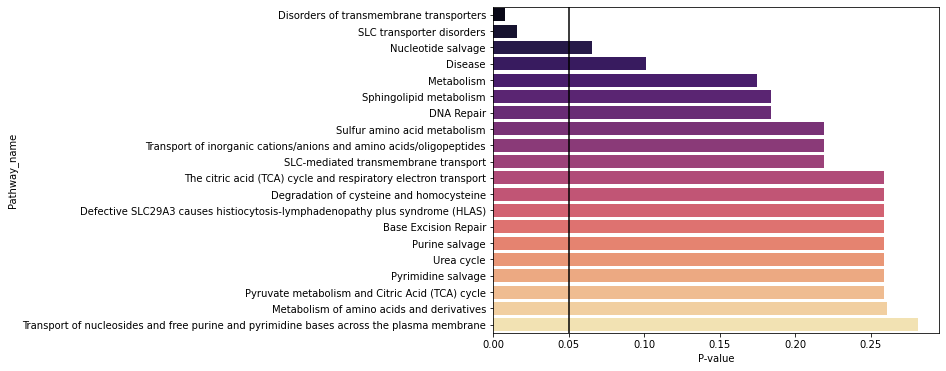

In [13]:
top_20_pathways = ora_res.sort_values(by="P-value").iloc[0:20, :]
plt.figure(figsize=(8, 6))
sns.barplot(data=top_20_pathways, y="Pathway_name", x="P-value", orient="h", palette="magma")
plt.axvline(0.05, c="black")
# plt.savefig("ORA_top_20.png", dpi=300, bbox_inches="tight")
plt.show()

### GSEA
GSEA is a popular method for pathway analysis in the transcriptomics community (Subramanian et al., 2005). The sspa package has a wrapper function to allow users to use the R-based fast implementation of GSEA, fGSEA (Korotkevich, Sukhov and Sergushichev, 2019). The sspa function sspa_fgsea uses the signal-to-noise ratio as the metabolite ranking metric for GSEA. We encourage users to read about various ranking metrics available (Zyla et al., 2017) and experiment with the fGSEA package if they wish to use other ranking metrics. 

Run gsea using the sspa_fgsea() function. This function requires the processed metabolomics data, a pandas series containing the sample metadata, and the pathways DataFrame as input. The ranking metric used is the signal-to-noise ratio. 


In [30]:
gsea_res = sspa.sspa_fgsea(processed_data_mapped, covid_data['Group'], reactome_pathways)

/Users/cw2019/opt/anaconda3/envs/py10/lib/python3.10/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
gsea_res.sort_values(by="P-value")

,ID,P-value,P-adjust,log2err,ES,NES,coverage,leadingEdge,Pathway_name
62,R-HSA-392499,0.003751,0.345156,0.431708,-0.775825,-1.737410,7,"[17596, 17012, 16610, 4208, 16335]",Metabolism of proteins
69,R-HSA-425397,0.011025,0.345156,0.380730,-0.637012,-1.647523,12,"[17596, 16708, 16525, 28865, 17368, 17562, 16335]","Transport of vitamins, nucleosides, and relate..."
86,R-HSA-5619063,0.011130,0.345156,0.380730,-0.826367,-1.544060,4,"[17596, 16708, 17562, 16335]",Defective SLC29A3 causes histiocytosis-lymphad...
116,R-HSA-74217,0.011130,0.345156,0.380730,-0.826367,-1.544060,4,"[17596, 16708, 17368, 16335]",Purine salvage
77,R-HSA-446193,0.014422,0.345156,0.380730,-0.948261,-1.438351,2,[17012],Biosynthesis of the N-glycan precursor (dolich...
...,...,...,...,...,...,...,...,...,...
52,R-HSA-2262752,0.942643,0.962013,0.058594,0.336352,0.619610,3,[17033],Cellular responses to stress
127,R-HSA-8953897,0.942643,0.962013,0.058594,0.336352,0.619610,3,[17033],Cellular responses to stimuli
55,R-HSA-3296197,0.962054,0.968391,0.052483,0.357827,0.570915,2,"[37098, 422]",Hydroxycarboxylic acid-binding receptors
85,R-HSA-561048,0.962054,0.968391,0.052483,0.357827,0.570915,2,"[17775, 422]",Organic anion transport


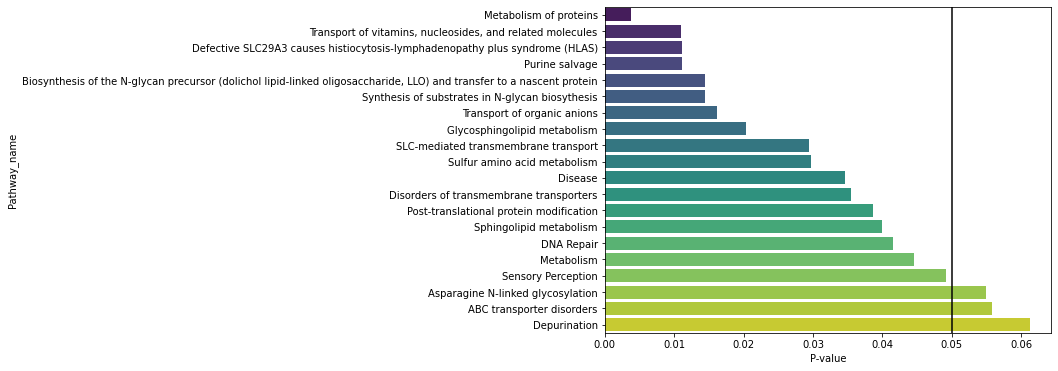

In [32]:
top_20_pathways_gsea = gsea_res.sort_values(by="P-value").iloc[0:20, :]
plt.figure(figsize=(8, 6))
sns.barplot(data=top_20_pathways_gsea, y="Pathway_name", x="P-value", orient="h", palette="viridis")
plt.axvline(0.05, c="black")
# plt.savefig("GSEA_top_20.png", dpi=300, bbox_inches="tight")
plt.show()

## Single-sample pathway analysis methods

Using kPCA method

In [34]:
kpca_scores = sspa.sspa_kpca(processed_data_mapped, reactome_pathways)

In [35]:
# Inspect the pathway score matrix
kpca_scores

,R-HSA-109582,R-HSA-110331,R-HSA-112310,R-HSA-112311,R-HSA-112315,R-HSA-112316,R-HSA-140179,R-HSA-1428517,R-HSA-1430728,R-HSA-1483115,...,R-HSA-9614085,R-HSA-964975,R-HSA-9658195,R-HSA-9660821,R-HSA-9662851,R-HSA-9664433,R-HSA-9709957,R-HSA-9717189,R-HSA-9717207,R-HSA-975576
sample_id,,,,,,,,,,,,,,,,,,,,,
1004596,-0.448773,0.313010,-0.368788,-0.340074,-0.368788,-0.368788,0.067384,-0.341381,0.294749,-0.546360,...,-0.584691,-0.282940,0.249453,0.249453,0.249453,0.249453,-0.332348,-0.340333,-0.450978,-0.413712
1008097,-0.015728,0.154036,-0.077837,0.163815,-0.077837,-0.077837,-0.488213,-0.133021,0.322667,-0.396208,...,-0.396269,-0.352126,-0.240810,-0.240810,-0.240810,-0.240810,0.167513,0.201817,0.460255,-0.405178
1008631,-0.450871,0.650693,-0.487282,-0.514555,-0.487282,-0.487282,-0.477390,-0.101638,0.216177,0.161405,...,-0.511029,0.537674,0.307325,0.307325,0.307325,0.307325,-0.266528,-0.278555,-0.416326,-0.087432
1012545,-0.498889,0.083014,-0.229884,-0.492828,-0.229884,-0.229884,0.002678,-0.452892,0.280323,-0.562422,...,0.028584,0.449219,0.484877,0.484877,0.484877,0.484877,0.473374,0.574951,0.652581,-0.556191
1022407,-0.516359,0.406756,-0.357086,-0.347376,-0.357086,-0.357086,-0.326984,-0.023716,0.081601,0.249861,...,-0.623148,-0.372968,0.440660,0.440660,0.440660,0.440660,0.019541,-0.076437,0.126641,0.158812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INCOV135-BL,0.475434,-0.586229,-0.219632,-0.021801,-0.219632,-0.219632,0.226481,0.470232,-0.094437,0.345654,...,0.315762,-0.101460,0.006583,0.006583,0.006583,0.006583,-0.542688,-0.582106,-0.672240,-0.134441
INCOV136-BL,-0.019905,-0.568692,0.247995,0.071790,0.247995,0.247995,0.712385,0.642871,-0.352549,0.231556,...,0.252397,0.129695,-0.410384,-0.410384,-0.410384,-0.410384,-0.193090,-0.191502,-0.098026,0.660226
INCOV137-BL,0.058872,-0.592848,0.373573,0.603599,0.373573,0.373573,-0.197808,-0.453162,-0.252056,0.614410,...,0.666124,0.451815,-0.270011,-0.270011,-0.270011,-0.270011,0.549952,0.500108,0.571216,0.527042


### Visualise single-sample pathway analysis results

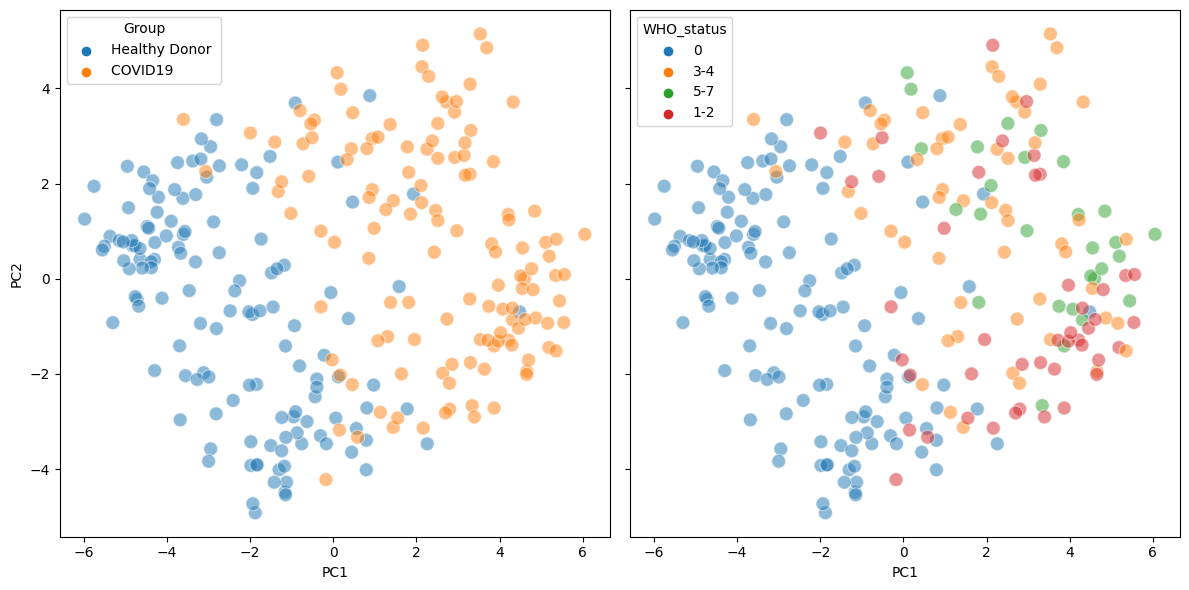

In [29]:
# Pathway-based PCA plot

# Perfom two component PCA using sklearn
pca = PCA(n_components=2).fit_transform(kpca_scores)

# Plot the first two components as a scatterplot
plt.style.use("default")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
sns.scatterplot(x=pca[:, 0 ], y=pca[:, 1], hue=covid_data["Group"], ax=ax1, s=100, alpha=0.5)
sns.scatterplot(x=pca[:, 0 ], y=pca[:, 1], hue=covid_data["WHO_status"], ax=ax2, s=100, alpha=0.5)

# Set axis labels 
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")

plt.tight_layout()
# plt.savefig(".kpca_pca_plots.png", dpi=350, bbox_inches="tight")

plt.show()

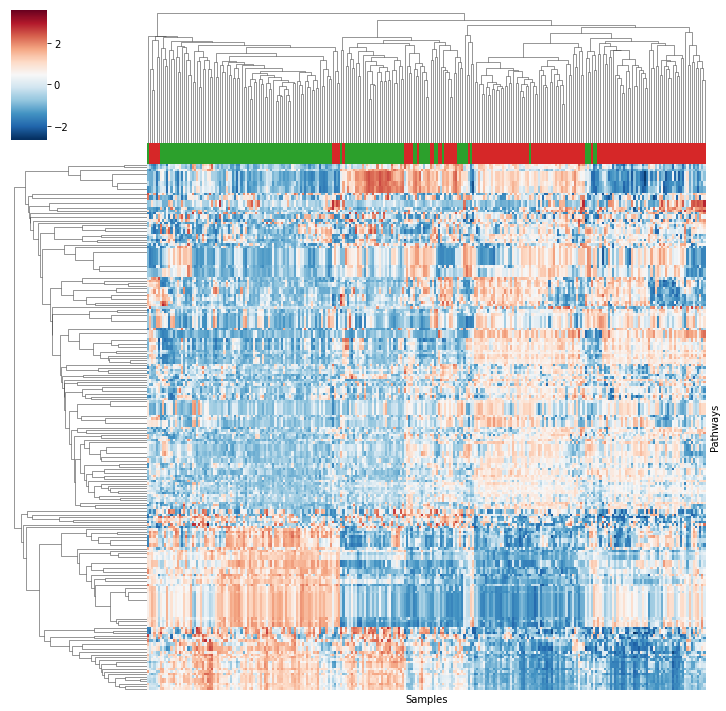

In [10]:
# Plot a heatmap using the pathway scores
g = sns.clustermap(kpca_scores.T,
               cmap="RdBu_r",
               z_score=1,
              col_colors = ["tab:red" if i == "COVID19 " else "tab:green" for i in covid_data["Group"]],
              xticklabels=False,
              yticklabels=False)
g.ax_heatmap.set_xlabel("Samples")
g.ax_heatmap.set_ylabel("Pathways")

# plt.savefig("kpca_heatmap.png", dpi=350, bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='R-HSA-109582', ylabel='R-HSA-112314'>

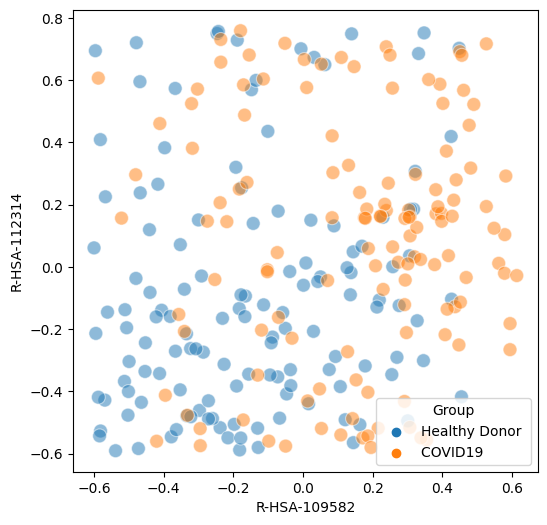

In [34]:
# Plot pathway scores from two pathways against each other
plt.style.use("default")
fig, ax1 = plt.subplots(1, 1, figsize=(6, 6), sharex=True, sharey=True)
sns.scatterplot(x=kpca_scores.loc[:, "R-HSA-109582"], y=kpca_scores.loc[:, "R-HSA-112314"],
 hue=covid_data["Group"], ax=ax1, s=100, alpha=0.5)
ax1.se


### Additional sspa methods

Using ssClustPA method

In [36]:
ssclustpa_res = sspa.sspa_cluster(processed_data_mapped, reactome_pathways)

In [37]:
ssclustpa_res.head()

,R-HSA-109582,R-HSA-110331,R-HSA-112310,R-HSA-112311,R-HSA-112315,R-HSA-112316,R-HSA-140179,R-HSA-1428517,R-HSA-1430728,R-HSA-1483115,...,R-HSA-9614085,R-HSA-964975,R-HSA-9658195,R-HSA-9660821,R-HSA-9662851,R-HSA-9664433,R-HSA-9709957,R-HSA-9717189,R-HSA-9717207,R-HSA-975576
sample_id,,,,,,,,,,,,,,,,,,,,,
1004596,1.524193,2.149807,1.233509,2.044686,1.245667,1.233509,1.130119,2.187310,6.124154,2.131817,...,1.186166,1.236661,1.663749,2.921099,1.662942,1.662942,2.392599,0.577297,1.464784,1.023403
1008097,1.940679,1.247930,1.971767,1.613380,1.965219,1.971767,0.845369,2.341290,6.017368,2.059881,...,1.382637,0.416886,1.803875,2.192993,1.794335,1.794335,3.350269,0.935886,0.950770,1.165560
1008631,1.548571,2.372639,0.806545,1.700307,0.757608,0.806545,0.941810,1.801163,6.336926,2.753052,...,0.949074,0.887795,1.144765,1.453090,1.139879,1.139879,2.044615,0.974150,1.435556,0.812452
1012545,1.889224,2.522454,1.646538,2.428441,1.670214,1.646538,1.115341,3.164734,6.185536,2.049922,...,1.085702,0.693042,1.434817,2.528114,1.446076,1.446076,2.908433,1.067960,0.557411,0.505524
1022407,2.198596,1.385961,0.889926,1.470033,0.904912,0.889926,0.474240,1.877859,8.042202,4.784716,...,0.413243,0.430117,0.728892,1.775351,0.714917,0.714917,3.168230,0.547168,0.844478,0.955483


Using ssClustPA(proj) method

In [8]:
ssclustpa_proj_res = sspa.sspa_cluster(processed_data_mapped, reactome_pathways, projection=True)
ssclustpa_proj_res.head()

,R-HSA-109582,R-HSA-110331,R-HSA-112310,R-HSA-112311,R-HSA-112314,R-HSA-112315,R-HSA-112316,R-HSA-1237112,R-HSA-1266738,R-HSA-1368082,...,R-HSA-9660821,R-HSA-9662851,R-HSA-9664433,R-HSA-9707564,R-HSA-9707616,R-HSA-9709957,R-HSA-9711123,R-HSA-9717189,R-HSA-9717207,R-HSA-975634
sample_id,,,,,,,,,,,,,,,,,,,,,
1004596,-1.138012,0.612266,-1.196473,1.058390,0.231663,1.186966,1.186966,-1.503746,-1.001217,1.001217,...,1.127729,1.127729,1.127729,0.626047,1.003367,1.019928,0.797385,0.264491,0.337755,1.001937
1008097,-1.239243,0.233183,0.821814,2.070620,0.366747,-0.281255,-0.281255,-0.777702,1.102165,-1.102165,...,0.795619,0.795619,0.795619,-0.189060,-1.109737,0.031585,0.359072,1.266075,0.844695,-1.103654
1008631,-0.675104,1.473881,0.650962,0.371524,0.504319,-0.550725,-0.550725,-1.029775,1.061683,-1.061683,...,0.053606,0.053606,0.053606,-0.485135,-1.067348,-1.241347,-0.340290,-0.714006,-0.387968,-1.062813
1012545,-0.966325,0.465256,-1.302114,1.257698,-0.186664,1.566948,1.566948,0.426893,-0.364646,0.364646,...,0.605926,0.605926,0.605926,1.671433,0.342733,0.749489,1.924766,-0.093753,0.319805,0.360651
1022407,-1.303047,0.707896,-1.311350,1.465829,0.759903,1.596556,1.596556,-0.534112,-0.518826,0.518826,...,0.803873,0.803873,0.803873,0.556161,0.513847,0.956530,0.785223,0.788806,0.559682,0.517576


Using z-score method

In [38]:
zscore_res = sspa.sspa_zscore(processed_data_mapped, reactome_pathways)

In [39]:
zscore_res.head()

,R-HSA-109582,R-HSA-110331,R-HSA-112310,R-HSA-112311,R-HSA-112315,R-HSA-112316,R-HSA-140179,R-HSA-1428517,R-HSA-1430728,R-HSA-1483115,...,R-HSA-9614085,R-HSA-964975,R-HSA-9658195,R-HSA-9660821,R-HSA-9662851,R-HSA-9664433,R-HSA-9709957,R-HSA-9717189,R-HSA-9717207,R-HSA-975576
sample_id,,,,,,,,,,,,,,,,,,,,,
1004596,0.457090,-0.711271,-1.397748,-1.046176,-1.397748,-1.397748,0.187717,-0.609464,-3.434376,-0.781320,...,-0.787468,-1.415639,-0.603738,-0.603738,-0.603738,-0.603738,-0.026597,-0.117513,-0.160936,-1.738374
1008097,-0.993119,-0.120412,-1.844493,-1.515670,-1.844493,-1.844493,-1.495914,-0.000446,-1.738864,-1.083332,...,-2.051787,-0.525661,-0.429673,-0.429673,-0.429673,-0.429673,1.326981,1.154814,0.901360,-1.538635
1008631,0.910881,-1.444900,-0.950140,-0.294227,-0.950140,-0.950140,-0.814119,-0.361688,-1.132265,-1.781481,...,-0.196933,0.613048,-0.211095,-0.211095,-0.211095,-0.211095,-0.290137,-0.689715,-0.709069,-0.341391
1012545,1.441909,-0.567366,0.168596,-0.367191,0.168596,0.168596,0.246480,-1.432125,-0.082758,-0.722931,...,-0.808399,0.427765,-0.937451,-0.937451,-0.937451,-0.937451,1.051095,0.664667,0.811050,-1.005567
1022407,0.460137,-0.487182,-0.410256,-0.647859,-0.410256,-0.410256,-0.312318,0.002792,-1.186402,-3.373450,...,-0.735371,-0.683723,-0.235746,-0.235746,-0.235746,-0.235746,-0.391630,0.658368,0.314006,0.227265


Using SVD (PLAGE) method

In [40]:
svd_res = sspa.sspa_svd(processed_data_mapped, reactome_pathways)
svd_res.head()

,R-HSA-109582,R-HSA-110331,R-HSA-112310,R-HSA-112311,R-HSA-112315,R-HSA-112316,R-HSA-140179,R-HSA-1428517,R-HSA-1430728,R-HSA-1483115,...,R-HSA-9614085,R-HSA-964975,R-HSA-9658195,R-HSA-9660821,R-HSA-9662851,R-HSA-9664433,R-HSA-9709957,R-HSA-9717189,R-HSA-9717207,R-HSA-975576
sample_id,,,,,,,,,,,,,,,,,,,,,
1004596,0.025154,0.038171,-0.048890,-0.038417,-0.048890,-0.048890,-0.009910,0.029593,0.066320,0.047038,...,0.047223,0.066037,0.047333,0.047333,0.047333,0.047333,-0.015102,-0.015411,-0.034028,0.090833
1008097,0.040495,0.006462,-0.072214,0.017332,-0.072214,-0.072214,0.078974,0.019038,0.070181,0.065221,...,0.123042,0.024521,0.011472,0.011472,0.011472,0.011472,-0.051686,-0.044387,0.006935,0.080396
1008631,0.012276,0.077541,-0.057978,-0.028659,-0.057978,-0.057978,0.042980,0.012810,0.039579,0.107252,...,0.011810,-0.028597,0.013049,0.013049,0.013049,0.013049,0.011780,0.016398,-0.013485,0.017838
1012545,0.016090,0.030448,-0.008567,-0.072126,-0.008567,-0.008567,-0.013012,0.060650,0.068101,0.043523,...,0.048478,-0.019954,0.058266,0.058266,0.058266,0.058266,-0.007852,0.003426,0.041747,0.052543
1022407,0.065893,0.026145,-0.020706,-0.010782,-0.020706,-0.020706,0.016488,0.008432,0.031450,0.203094,...,0.044099,0.031894,0.019446,0.019446,0.019446,0.019446,-0.016561,-0.033974,-0.001071,-0.011875


Using GSVA (Hanzelmann et al)

In [41]:
gsva_res = sspa.sspa_gsva(processed_data_mapped, reactome_pathways)
gsva_res.head()

Estimating GSVA scores for 149 gene sets.
Estimating ECDFs with Gaussian kernels
  |======================================================================| 100%



,R-HSA-109582,R-HSA-110331,R-HSA-112310,R-HSA-112311,R-HSA-112315,R-HSA-112316,R-HSA-140179,R-HSA-1428517,R-HSA-1430728,R-HSA-1483115,...,R-HSA-9614085,R-HSA-964975,R-HSA-9658195,R-HSA-9660821,R-HSA-9662851,R-HSA-9664433,R-HSA-9709957,R-HSA-9717189,R-HSA-9717207,R-HSA-975576
1004596,0.557956,-0.305306,-0.442082,-0.641093,-0.442082,-0.442082,0.465782,-0.009615,-0.235079,-0.522469,...,-0.142067,-0.710191,-0.019745,-0.019745,-0.019745,-0.019745,0.073718,0.073482,0.073248,-0.859873
1008097,-0.488818,0.054140,-0.606645,-0.732484,-0.606645,-0.606645,-0.713376,0.309464,-0.021141,-0.640127,...,-0.910828,-0.160310,0.104211,0.104211,0.104211,0.104211,0.724359,0.686901,0.668790,-0.758336
1008631,0.505401,-0.770701,-0.471927,-0.132166,-0.471927,-0.471927,-0.745223,0.016026,0.011078,-0.708191,...,0.068132,0.691083,0.070513,0.070513,0.070513,0.070513,-0.092560,-0.380732,-0.541401,-0.193663
1012545,0.594249,-0.248269,-0.070523,-0.521196,-0.070523,-0.070523,0.060510,-0.625770,-0.043899,-0.851183,...,-0.824158,0.512739,-0.560000,-0.560000,-0.560000,-0.560000,0.586538,0.388019,0.488854,-0.582803
1022407,0.649444,-0.243491,0.054839,-0.347134,0.054839,0.054839,-0.312102,0.323696,0.164117,-0.719212,...,-0.462420,-0.324841,0.169872,0.169872,0.169872,0.169872,0.009836,0.578275,0.442675,0.515924
